# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

proportion of monetary gifts: 0.39
proportion of contracts: 0.61
proportion of real estate: 0.00 


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


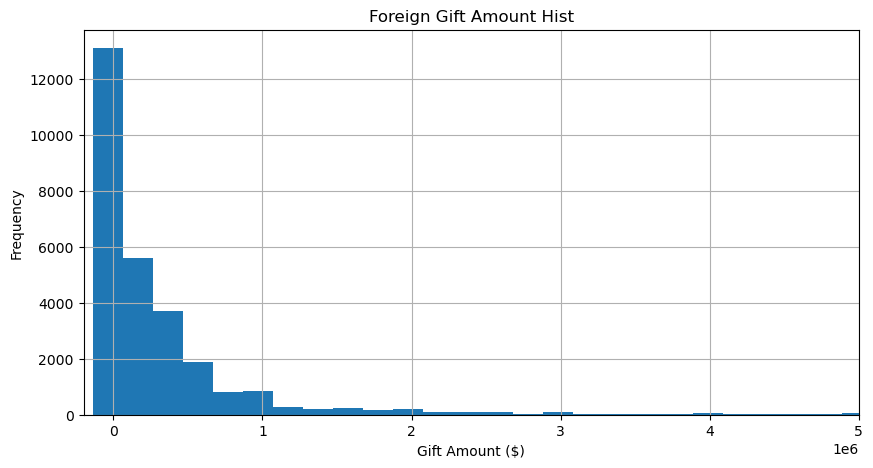

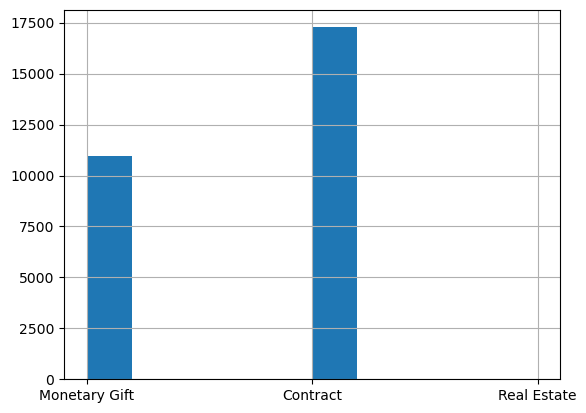

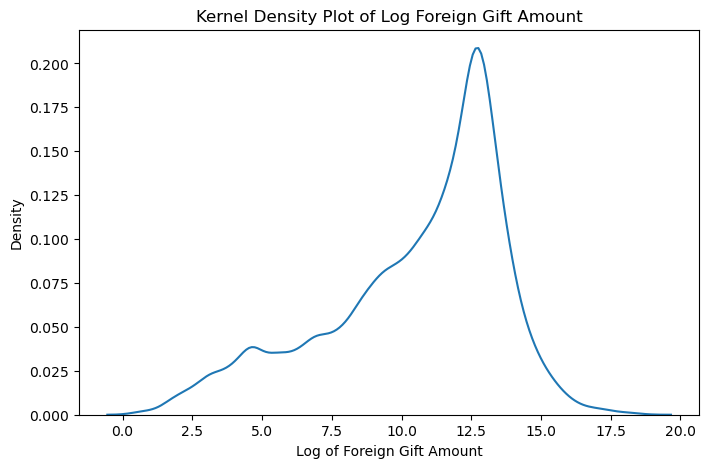

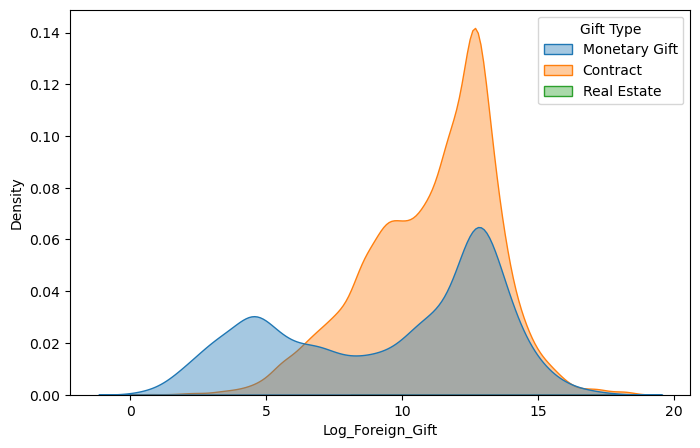

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

college_df=pd.read_csv('./data/ForeignGifts_edu.csv')

plt.figure(figsize=(10,5))
college_df['Foreign Gift Amount'].hist(bins=500)
plt.xlim(-200000,5000000) # I did cut off some extremely high outliers here but it seems the majority of gifts seem to be between 0 and  million dollars
plt.title('Foreign Gift Amount Hist')
plt.xlabel('Gift Amount ($)')
plt.ylabel('Frequency')

plt.figure()
college_df['Gift Type'].hist()
mon_gift=sum(college_df['Gift Type']=='Monetary Gift')
contract=sum(college_df['Gift Type']=='Contract')
re=sum(college_df['Gift Type']=='Real Estate')

print(f'proportion of monetary gifts: {mon_gift/len(college_df['Gift Type']):.2f}\nproportion of contracts: {contract/len(college_df['Gift Type']):.2f}\nproportion of real estate: {re/len(college_df['Gift Type']):.2f} ')

college_df['Log_Foreign_Gift'] = np.log1p(college_df['Foreign Gift Amount'])
college_df = college_df.dropna(subset=['Gift Type'])

plt.figure(figsize=(8, 5))
sns.kdeplot(college_df['Log_Foreign_Gift'])
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Log Foreign Gift Amount")
plt.show()

plt.figure(figsize=(8, 5))
ax = sns.kdeplot(
    data=college_df, 
    x="Log_Foreign_Gift", 
    hue="Gift Type",  
    fill=True, 
    alpha=0.4
)

# Patterns noticed: Contracts generally involve larger amounts compared to monetary gifts; Monetary gifts have more variability in size, while contracts are concentrated at higher values.


In [54]:
top_countries_gifts = college_df['Country of Giftor'].value_counts().nlargest(15)
top_countries_amount = college_df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print(f'Top countries by gifts:\n {top_countries_gifts}\n\nTop countries by gift amount:\n {top_countries_amount}\n')

Top countries by gifts:
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top countries by gift amount:
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409

Top Institution Recipients:
 Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


Text(0.5, 1.0, 'Total Gift Amount by Institution')

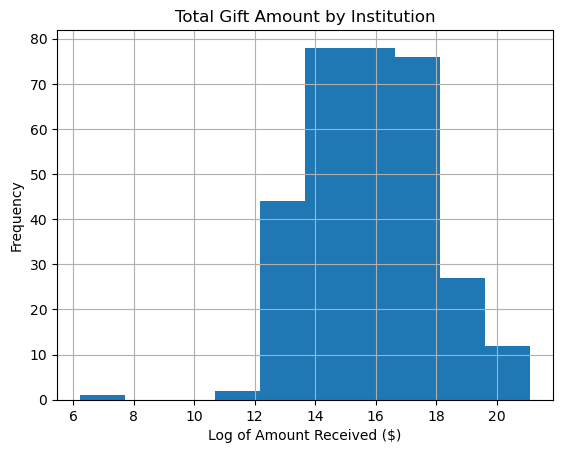

In [72]:
top_institutions_received = college_df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print(f'Top Institution Recipients:\n {top_institutions_received}')

institutions_received = np.log1p(college_df.groupby('Institution Name')['Foreign Gift Amount'].sum())
institutions_received.hist()
plt.xlabel('Log of Amount Received ($)')
plt.ylabel('Frequency')
plt.title('Total Gift Amount by Institution')

In [80]:

top_institutions_received= college_df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print(f'Top Giftors: \n{top_institutions_received}')

Top Giftors: 
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [112]:
airbnb_df=pd.read_csv('./data/airbnb_hw.csv')

print(f'Dimensions of data: {airbnb_df.shape}\nNumber of observations: {len(airbnb_df['Name'])}\nVariables: {airbnb_df.columns}\n')
room_property_crosstab = pd.crosstab(airbnb_df['Room Type'], airbnb_df['Property Type'])
room_property_crosstab # These results make sense. For example, it is very reasonable that every tent would also belong to the private room category. Private rooms are more common in dorms, which makes sense because most dorms are shared.

Dimensions of data: (30478, 13)
Number of observations: 30478
Variables: Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')



Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


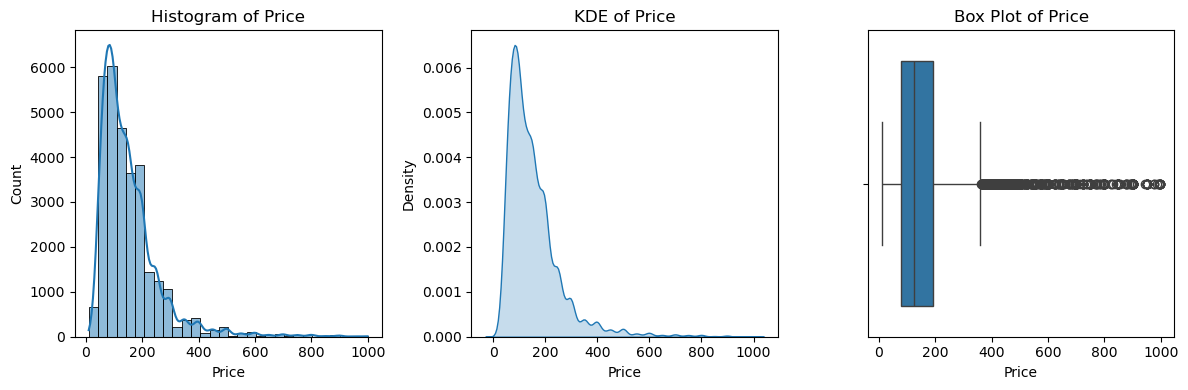

In [124]:
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce') #had to change column from str to number
prices = airbnb_df['Price'].dropna()  # removes the missing values

plt.figure(figsize=(12, 4))

# This is the code for the hist
plt.subplot(1, 3, 1)
sns.histplot(prices, bins=30, kde=True)
plt.title("Histogram of Price")

# This is the code for the KDE
plt.subplot(1, 3, 2)
sns.kdeplot(prices, fill=True)
plt.title("KDE of Price")

# This is the code for the box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=prices)
plt.title("Box Plot of Price")

plt.tight_layout()
plt.show()


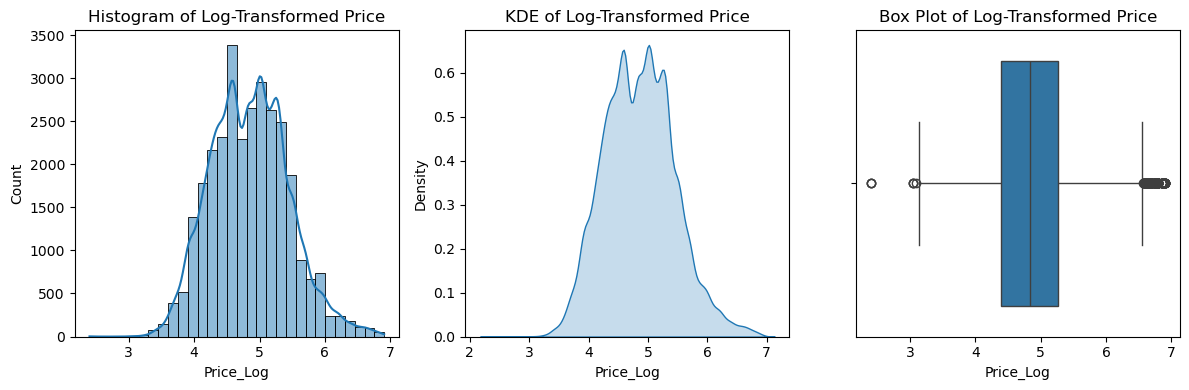

In [130]:
# The log version
airbnb_df['Price_Log'] = np.log1p(airbnb_df['Price'])  # log(1 + Price) to avoid log(0)
price_log = airbnb_df['Price_Log']

plt.figure(figsize=(12, 4))

# hist
plt.subplot(1, 3, 1)
sns.histplot(price_log, bins=30, kde=True)
plt.title("Histogram of Log-Transformed Price")

# KDE
plt.subplot(1, 3, 2)
sns.kdeplot(price_log, fill=True)
plt.title("KDE of Log-Transformed Price")

# box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=price_log)
plt.title("Box Plot of Log-Transformed Price")

plt.tight_layout()
plt.show()

# Looks sm better yay!

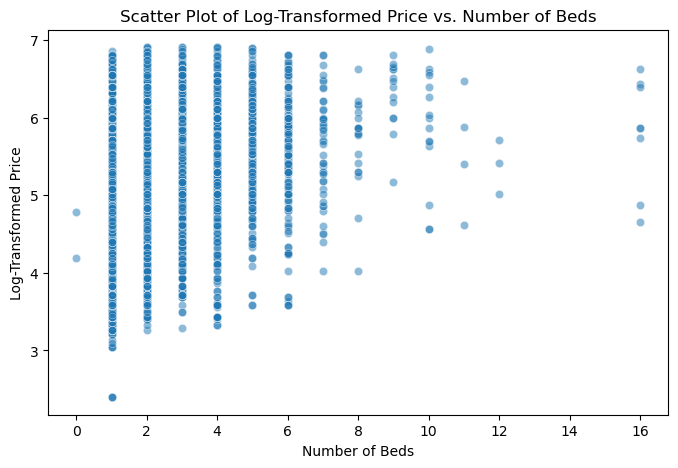

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

In [138]:
# some necessary prep
airbnb_df['Beds'] = pd.to_numeric(airbnb_df['Beds'], errors='coerce')
airbnb_df = airbnb_df.dropna(subset=['Price_Log', 'Beds'])


plt.figure(figsize=(8, 5))
sns.scatterplot(data=airbnb_df, x='Beds', y='Price_Log', alpha=0.5)
plt.xlabel("Number of Beds")
plt.ylabel("Log-Transformed Price")
plt.title("Scatter Plot of Log-Transformed Price vs. Number of Beds")
plt.show()

# summary stats
price_by_beds = airbnb_df.groupby('Beds')['Price'].describe()
print(price_by_beds)

# I think it's really interesting that the mean peaks in the middle of bed number. It's odd that it's more expensive to rent a 9 bedroom than a 16 bedroom

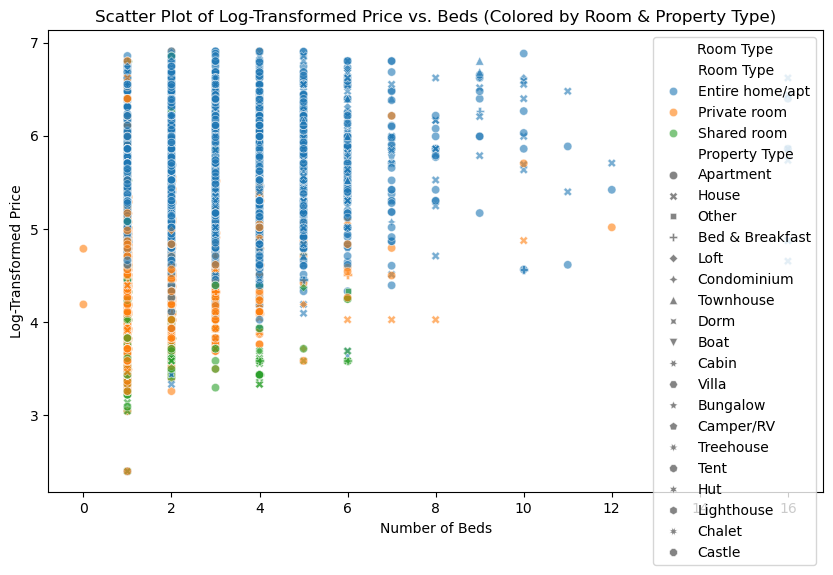

In [142]:
# some more prep of course
airbnb_df['Beds'] = pd.to_numeric(airbnb_df['Beds'], errors='coerce')
airbnb_df = airbnb_df.dropna(subset=['Price_Log', 'Beds', 'Room Type', 'Property Type'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=airbnb_df,
    x='Beds',
    y='Price_Log',
    hue='Room Type',
    style='Property Type',
    alpha=0.6
)
plt.xlabel("Number of Beds")
plt.ylabel("Log-Transformed Price")
plt.title("Scatter Plot of Log-Transformed Price vs. Beds (Colored by Room & Property Type)")
plt.legend(title="Room Type")
plt.show()

# It seems entire homes go for more than private rooms, which go for more than shared rooms. This makes sense, as increasing comfort and space should correlate with increasing price 

In [144]:
# stats
price_by_category = airbnb_df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(price_by_category)

# It seems Entire Home and Apartments in Luxury Property Types has the highest avg. price
# Larger luxury homes have more variablility (SD), which tracks, as "luxury" is a very variable term

                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15521.0  200.188970  109.913339   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              722.0  234.709141  159.842688   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

In [148]:
# looking at mean/median
price_by_category[['mean', '50%']] 
# The median is a better measure of central tendency than the mean, due to extreme price outliers. This can be seen again with the luxury spaces, as there are many outliers and a large spread.

mean    50%
Room Type       Property Type                     
Entire home/apt Apartment        200.188970  175.0
                Bed & Breakfast  184.538462  130.0
                Boat             158.428571  150.0
                Bungalow         150.750000  160.5
                Cabin            250.000000  250.0
                Camper/RV        114.333333   74.0
                Condominium      281.126761  200.0
                Dorm              44.250000   33.5
                House            234.709141  188.5
                Lighthouse        39.000000   39.0
                Loft             284.910290  220.0
                Other            290.800000  177.5
                Townhouse        242.037037  189.0
                Villa            206.333333  200.0
Private room    Apartment         91.436051   82.0
                Bed & Breakfast   97.161290   85.0
                Boat             120.000000  120.0
                Cabin             80.000000   80.0
                Camper/RV         39.000000   39.0
                Castle           150.000000  150.0
                Chalet            99.000000   99.0
                Condominium       98.590909   90.0
                Dorm              88.333333   70.0
                House             77.623802   69.0
                Hut               75.000000   75.0
                Loft              99.077419   85.0
                Other            176.642857  114.0
                Tent             126.250000  107.5
                Townhouse         83.365385   80.0
                Treehouse         95.000000   95.0
                Villa            126.250000  125.0
Shared room     Apartment         77.382138   66.0
                Bed & Breakfast  143.666667   65.0
                Dorm              73.181818   55.0
                House             46.822785   45.0
                Loft              78.816327   50.0
                Other            148.750000   87.5
                Townhouse         95.000000   95.0
                Treehouse        167.666667  108.0

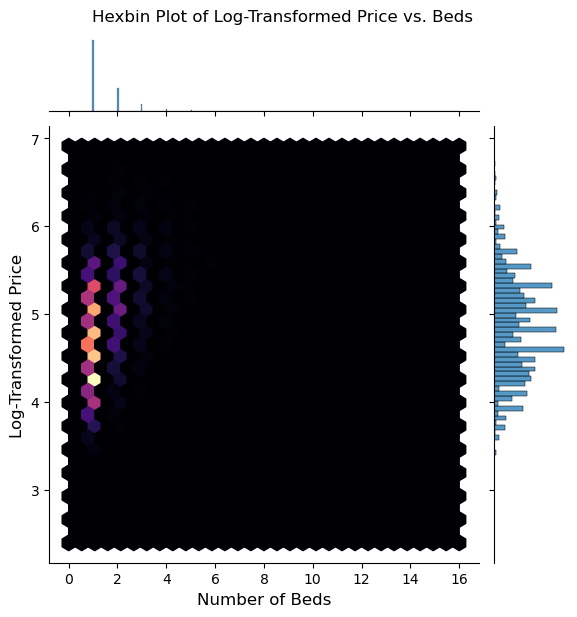

In [156]:
g = sns.jointplot(
    data=airbnb_df, 
    x="Beds", 
    y="Price_Log", 
    kind="hex", 
    gridsize=30,  
    cmap="magma"  # Somethingg fun
)

g.set_axis_labels("Number of Beds", "Log-Transformed Price", fontsize=12)
plt.suptitle("Hexbin Plot of Log-Transformed Price vs. Beds", y=1.02)
plt.show()

# most listings cluster around 1-3 beds with a reasonable price_log range.
# few highly priced properties, but they are less frequent
# hexbin plot shows density clearly, unlike previous plots. The overlapping makes it more difficult to read.
# the scatterplots overrepresented extreme values, making it seem like high-price, multi-bed properties were more common than they are
# thsi also reinforces my thinking that the median is more reasonable than the mean.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.